In [ ]:
!pip install scikit-fuzzy

In [2]:
from sklearn.datasets import load_sample_image
from skimage.util import random_noise
from skimage.transform import rescale
from matplotlib import pyplot as plt
from skfuzzy.cluster import cmeans 
import numpy as np

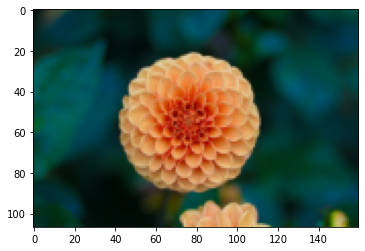

In [3]:
img = load_sample_image("flower.jpg")
image = rescale(img, 0.25, multichannel = True)

plt.imshow(image)

In [4]:
# Generate image with noise
images_noise = []
noise_ratios = [0, 0.02, 0.05]
for i in range(3):
  images_noise.append(random_noise(image, mode = "s&p", seed = 1, amount = noise_ratios[i]))

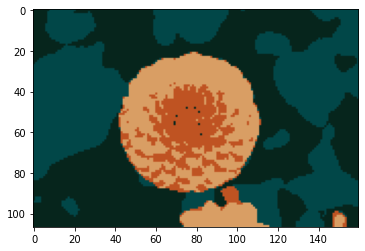

In [5]:
def cluster_image(image, n_clusters, fuzzifier):
  # reshape image matrix -> pixels x color channels
  imgheight = image.shape[0]
  imgwidth = image.shape[1]
  n = imgwidth * imgheight #number of pixels
  image = image.reshape(n,3)

  #apply fuzzy k-means
  centroids,fuzzymatrix,_,_,_,_,_ = cmeans(data = image.T, c = n_clusters, m = fuzzifier, error=0.0001, maxiter = 2000)
  cluster_membership = np.argmax(fuzzymatrix, axis=0)

  #replace colours with centroids
  image = centroids[cluster_membership]
  image = image.reshape(imgheight, imgwidth, 3)
  return image

image_seg = cluster_image(image, n_clusters = 4, fuzzifier = 2)

plt.imshow(image_seg)

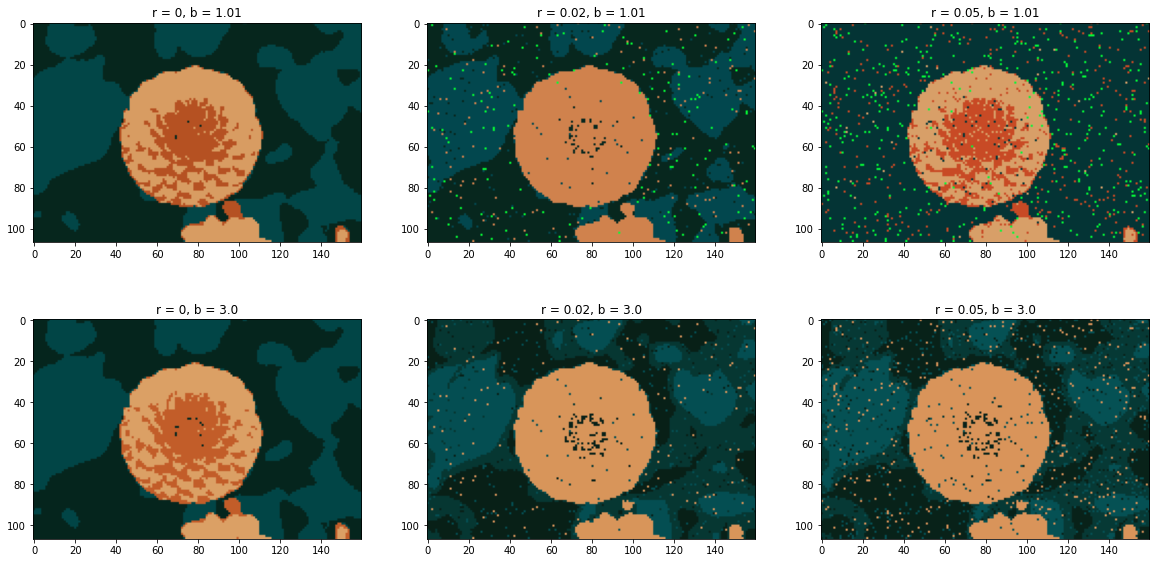

In [6]:
fuzzifiers = [1.01, 3.00]
fig, axs = plt.subplots(nrows =2, ncols = 3, figsize = (20,10)) 
for i in range(2):
  for j in range(3):
    image_seg = cluster_image(images_noise[j], n_clusters=4, fuzzifier = fuzzifiers[i])
    axs[i][j].imshow(image_seg)
    axs[i][j].set_title("r = {}, b = {}".format(noise_ratios[j], fuzzifiers[i]))
